In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
sns.set_style("whitegrid")

X, y = datasets.load_diabetes(as_frame=True, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    
    model.fit(X_train, y_train)

    # Make predictions on the training and test datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate MAE for training and test datasets
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Get the coefficients and intercept of the linear regression model
    intercept = model.intercept_
    coefficients = model.coef_

    # Print MAE for training and test datasets
    print("MAE on training dataset:", mae_train)
    print("MAE on test dataset:", mae_test)

    # Print the equation of the linear regression model
    print("Linear Regression Equation:")
    print("y = {:.2f} + {:.2f} * x1 + {:.2f} * x2 + ... + {:.2f} * xn".format(intercept, *coefficients))
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()


In [20]:
lnModel = LinearRegression()
lnMdl = lnModel.fit(X_train,y_train)
lnMdl

LinearRegression()

In [21]:
y_train_predic_ln = lnMdl.predict(X_train)
y_test_ln = lnMdl.predict(X_test)

Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 37.90 * x_0 + -241.97 * x_1 + 542.43 * x_2 + 347.71 * x_3 + -931.46 * x_4 + 518.04 * x_5 + 163.40 * x_6 + 275.31 * x_7 + 736.19 * x_8 + 48.67 * x_9 + 151.35


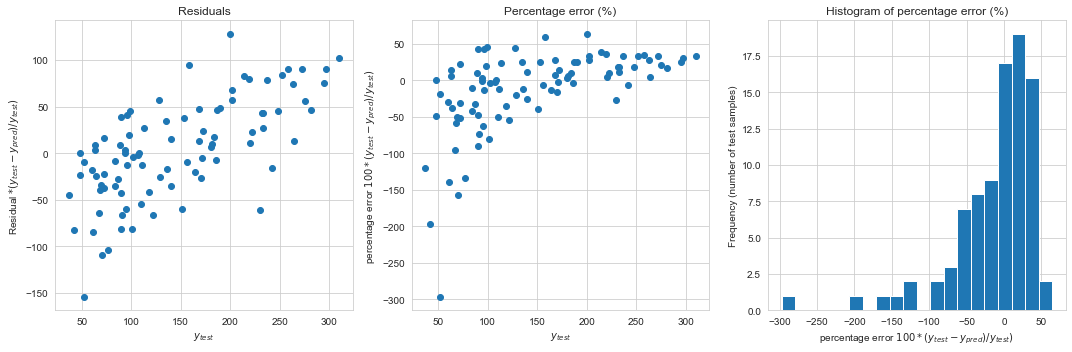

In [22]:
model_estimation(lnMdl, y_train, y_test, y_train_predic_ln, y_test_ln)

In [9]:
poly_Reg = PolynomialFeatures(degree=2, include_bias=False)  #second degree of polynomial regression
poly_Reg

PolynomialFeatures(include_bias=False)

In [10]:
x_poly_train = poly_Reg.fit_transform(X_train)
x_poly_test = poly_Reg.fit_transform(X_test)

In [11]:
polynom_Reg_mod= LinearRegression()
poly_reg_Mod = polynom_Reg_mod.fit(x_poly_train,y_train)


In [12]:
y_poly_predic_train = poly_reg_Mod.predict(x_poly_train)
y_ploy_predic_test = poly_reg_Mod.predict(x_poly_test)

Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = 108.80 * x_0 + -311.88 * x_1 + 421.94 * x_2 + 391.31 * x_3 + -16653.11 * x_4 + 14516.33 * x_5 + 5930.19 * x_6 + 44.27 * x_7 + 6130.02 * x_8 + 9.88 * x_9 + 2389.37 * x_10 + 1524.85 * x_11 + -1290.33 * x_12 + 662.50 * x_13 + -943.43 * x_14 + -7241.01 * x_15 + 5909.98 * x_16 + 9799.32 * x_17 + 1225.37 * x_18 + 860.27 * x_19 + -1.88 * x_20 + 345.95 * x_21 + 1254.67 * x_22 + 1618.98 * x_23 + 1647.06 * x_24 + -3533.93 * x_25 + -7603.59 * x_26 + 2127.90 * x_27 + 687.73 * x_28 + 801.38 * x_29 + 3348.07 * x_30 + -6153.61 * x_31 + 7296.31 * x_32 + -212.22 * x_33 + -3585.06 * x_34 + 3693.92 * x_35 + 474.71 * x_36 + -256.24 * x_37 + 19935.53 * x_38 + -14643.00 * x_39 + -8286.60 * x_40 + -1392.43 * x_41 + -7897.00 * x_42 + -3302.51 * x_43 + 93824.07 * x_44 + -129517.28 * x_45 + -61881.49 * x_46 + -25250.95 * x_47 + -41828.69 * x_48 + -7837.05 * x_49 + 46016.19 * x_50 + 34740.31 * x_51 + 6471.07 * x_52 + 25010.42 

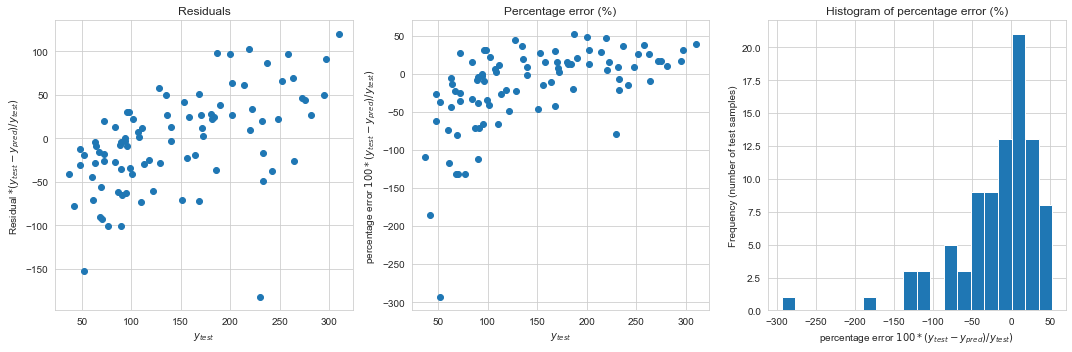

In [13]:
model_estimation(poly_reg_Mod,y_train,y_test,y_poly_predic_train,y_ploy_predic_test)

In [14]:
X_train.shape 
print("Those are the parameters used for fitting linear regression:", list(X_train.columns))

Those are the parameters used for fitting linear regression: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [24]:
poly = poly_Reg.get_feature_names_out()
print(poly.shape)
print("Those are the parameters used for fitting polynomial regression:",list(poly))

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names_out'

In [17]:
print("Test Data: Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_test_ln))
print("Train Data: Mean Absolute Error: ", metrics.mean_absolute_error(y_train,y_train_predic_ln))
print("\n")
print("Mean Sqaure Error: ",metrics.mean_squared_error(y_test,y_test_ln))
print("Mean Absoulte Error: ",metrics.mean_absolute_error(y_test,y_test_ln))
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_test_ln)))
print("Mean Absolute Perecntage Error: ",metrics.mean_absolute_percentage_error(y_test, y_test_ln))

Test Data: Mean Absolute Error:  42.79389304196525
Train Data: Mean Absolute Error:  43.48354927478367


Mean Sqaure Error:  2900.1732878832313
Mean Absoulte Error:  42.79389304196525
Root Mean Square Error:  53.853256984914395
Mean Absolute Perecntage Error:  0.37499812530899335


In [19]:
print("Test Data: Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_ploy_predic_test))
print("Train Data: Mean Absolute Error: ", metrics.mean_absolute_error(y_train,y_poly_predic_train))
print("\n")
print("Mean Sqaure Error: ",metrics.mean_squared_error(y_test,y_ploy_predic_test))
print("Mean Absoulte Error: ",metrics.mean_absolute_error(y_test,y_ploy_predic_test))
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_ploy_predic_test)))
print("Mean Absolute Perecntage Error: ",metrics.mean_absolute_percentage_error(y_test, y_ploy_predic_test))

Test Data: Mean Absolute Error:  43.57772612647229
Train Data: Mean Absolute Error:  39.14230394812442


Mean Sqaure Error:  3095.7750858530617
Mean Absoulte Error:  43.57772612647229
Root Mean Square Error:  55.63968984325004
Mean Absolute Perecntage Error:  0.38281719178784107


#### The selection of the deployment model depends on multiple factors. In this particular scenario involving two models, I would opt for linear regression. This choice is driven by the strong model performance metrics such as MAE and MAPE, as well as the minimal difference between test and train data in linear regression, suggesting the absence of overfitting.
## 3)What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?
#### Residuals Scatter Plot:
####     -) In the linear model, percentage errors are scattered in a random manner around zero when compared to the polynomial model, resulting in a lower Mean Absolute Percentage Error (MAPE).
#### Percentage Error Scatter Plot:
####         -) In the linear model, percentage errors are scattered in a random manner around zero when compared to the polynomial model, resulting in a lower Mean Absolute Percentage Error (MAPE). 
#### Histogram of Percentage Error:
#####         -) In the case of the linear model, the distribution is right-skewed, while for the polynomial model, it exhibits a relatively symmetric pattern.